<a href="https://colab.research.google.com/github/vishal-sr/MNIST-Experimental-Approach/blob/main/MNIST_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification for MNIST [An Experimental Approach]

## Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

import time

## Dataset

### Load dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Split the test data into validation data and test data

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [ ]:
print(f"Size of TRAIN SET: {len(X_train)}")
print(f"Size of VALIDATION SET: {len(X_val)}")
print(f"Size of TEST SET: {len(X_test)}")

Size of TRAIN SET: 60000
Size of VALIDATION SET: 5000
Size of TEST SET: 5000


### Processing the data

In [ ]:
X_train, X_test, X_val = X_train / 255.0, X_test / 255.0, X_val / 255.0
X_train, X_test, X_val = X_train.reshape(60000, 28, 28, 1), X_test.reshape(5000, 28, 28, 1), X_val.reshape(5000, 28, 28, 1)
y_train, y_test, y_val = to_categorical(y_train), to_categorical(y_test), to_categorical(y_val)

## Defining a function to calculate the model test accuracy

In [ ]:
def calc_acc(model, x, y, *args, **kwargs):
  result = model.predict(x)
  finalResult = np.argmax(result, axis = 1)
  correct = 0
  for i in range(len(y)):
    if finalResult[i] == np.argmax(y[i]):
      correct += 1

  return (correct / len(y))*100

# Experiment starts from here 👇

##Notations:
32C3 - 32 filters, convolution layer, kernel_size 3<br>
P2 - max pooling with pool_size 2

## Experiment 1: Playing w/ Conv and Maxpool layers

Trying out simple CNN architecture
<br>
<br>
1. (32C3-P2)--128--10<br>
1. (32C3-P2)--(64C3-P2)--128--10<br>
1. (32C3-P2)--(32C3-P2)--(64C3-P2)--128--10<br>
1. (32C3-P2)--(32C3-P2)--(64C3-P2)--(64C3-P2)--128--10<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--128--10<br>
<br>

In [ ]:
exp1_models = []
for i in range(5):
    exp1_model = Sequential()
    if i < 4:
        exp1_model.add(Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation='relu',
            kernel_initializer='he_uniform',
            padding='same',
            input_shape=(28, 28, 1),
            ))
        exp1_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 1:
        exp1_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp1_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 2:
        exp1_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp1_model.add(MaxPool2D(pool_size=(2, 2), strides=2))
        exp1_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp1_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 3:
        exp1_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp1_model.add(MaxPool2D(pool_size=(2, 2), strides=2))
        exp1_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp1_model.add(MaxPool2D(pool_size=(2, 2), strides=2))
        exp1_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp1_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 4:
        exp1_model.add(Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp1_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp1_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

        exp1_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp1_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp1_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    exp1_model.add(Flatten())

    exp1_model.add(Dense(units=128, activation='relu'))
    exp1_model.add(Dense(units=10, activation='softmax'))

    exp1_model.compile(loss='categorical_crossentropy', optimizer='adam'
                       , metrics=['accuracy'])
    exp1_model.fit(x=X_train, y=y_train, epochs=20,
                   validation_data=(X_val, y_val))

    exp1_models.append(exp1_model)
    exp1_model = None

Epoch 1/20
1875/1875 [==============================] - 35s 3ms/step - loss: 0.2580 - accuracy: 0.9165 - val_loss: 0.0630 - val_accuracy: 0.9784
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.0380 - val_accuracy: 0.9872
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0533 - val_accuracy: 0.9844
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.0470 - val_accuracy: 0.9846
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0516 - val_accuracy: 0.9862
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0420 - val_accuracy: 0.9890
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0512 - val_accuracy

In [ ]:
for i, exp1_model in enumerate(exp1_models):
  print(f"Model: ",i+1,"\n\n")
  print(exp1_model.summary())
  print("\n\n\n")

Model:  1 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________
None




Model:  2 


Model: "sequential_1"
___________________________________________________________

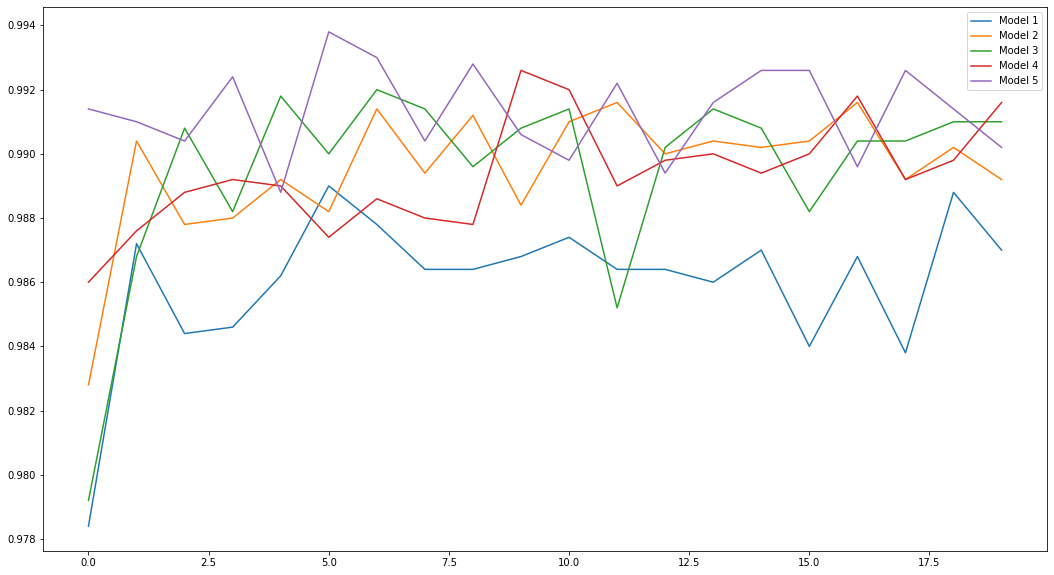

In [ ]:
history = []
plt.figure(figsize = (18, 10))
for i, exp1_model in enumerate(exp1_models):
  history.append(pd.DataFrame(exp1_model.history.history))
  plt.plot(history[i]['val_accuracy'], label = f'Model {i+1}')
  plt.legend()
plt.show()

In [ ]:
accuracies = {
    'val_acc': [],
    'test_acc': [],
    'indexes': [],
}
for i, exp1_model in enumerate(exp1_models):
  accuracies['val_acc'].append(history[i]['val_accuracy'][len(history[i]['val_accuracy'])-1])
  accuracies['test_acc'].append(calc_acc(exp1_model, X_test, y_test))
  accuracies['indexes'].append(f'model {i+1}')

for prop in accuracies:
  if prop == 'indexes':
    break
  elif prop == 'val_acc':
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i]*100, 3)
  else:
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i], 3)

accuracies_df = pd.DataFrame(accuracies, index = accuracies['indexes'])
accuracies_df.drop(['indexes'], axis = 1, inplace = True)

In [ ]:
accuracies_df

,val_acc,test_acc
model 1,98.70,98.74
model 2,98.92,99.12
model 3,99.10,99.22
model 4,99.16,98.92
model 5,99.02,99.02


## Experiment 2: Playing w/ feature maps.

From experiment 1,<br>
Model 2, Model 3 and Model 5 performed well.
<br>
<br>
1. (16C3-P2)--(24C3-P2)--128--10<br>
1. (16C3-P2)--(32C3-P2)--128--10<br>
1. (16C3-P2)--(64C3-P2)--128--10<br>
1. (24C3-P2)--(32C3-P2)--128--10<br>
1. (24C3-P2)--(64C3-P2)--128--10<br>
1. (32C3-P2)--(64C3-P2)--128--10<br>
<br>
1. (16C3-P2)--(16C3-P2)--(24C3-P2)--128--10<br>
1. (16C3-P2)--(16C3-P2)--(32C3-P2)--128--10<br>
1. (16C3-P2)--(16C3-P2)--(64C3-P2)--128--10<br>
1. (24C3-P2)--(24C3-P2)--(32C3-P2)--128--10<br>
1. (24C3-P2)--(24C3-P2)--(64C3-P2)--128--10<br>
1. (32C3-P2)--(32C3-P2)--(64C3-P2)--128--10<br>
<br>
1. (16C3-16C3-P2)--(24C3-24C3-P2)--128--10<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--128--10<br>
1. (16C3-16C3-P2)--(64C3-64C3-P2)--128--10<br>
1. (24C3-24C3-P2)--(32C3-32C3-P2)--128--10<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--128--10<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--128--10<br>
<br>



In [ ]:
exp2_models = []
for i in range(18):
    exp2_model = Sequential()
    if i < 3:
        exp2_model.add(Conv2D(
            filters=16,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 3 or i == 4:
        exp2_model.add(Conv2D(
            filters=24,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 5:
        exp2_model.add(Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 0:
        exp2_model.add(Conv2D(filters=24, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 1 or i == 3:
        exp2_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 2 or i == 4 or i == 5:
        exp2_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i > 5 and i < 9:
        exp2_model.add(Conv2D(
            filters=16,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

        exp2_model.add(Conv2D(filters=16, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 9 and i == 10:
        exp2_model.add(Conv2D(
            filters=24,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

        exp2_model.add(Conv2D(filters=24, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 11:
        exp2_model.add(Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

        exp2_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 6:
        exp2_model.add(Conv2D(filters=24, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 7 or i == 9:
        exp2_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 8 or i == 10 or i == 11:
        exp2_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i > 11 and i < 15:
        exp2_model.add(Conv2D(
            filters=16,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp2_model.add(Conv2D(filters=16, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 15 or i == 16:
        exp2_model.add(Conv2D(
            filters=24,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp2_model.add(Conv2D(filters=24, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 17:
        exp2_model.add(Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            kernel_initializer='he_uniform',
            input_shape=(28, 28, 1),
            ))
        exp2_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))
        exp2_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 12:
        exp2_model.add(Conv2D(filters=24, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(Conv2D(filters=24, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 13:
        exp2_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 14:
        exp2_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 15:
        exp2_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(Conv2D(filters=32, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 16:
        exp2_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(Conv2D(filters=64, kernel_size=(3, 3),
                       padding='same', activation='relu',
                       kernel_initializer='he_uniform'))
        exp2_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    exp2_model.add(Flatten())
    exp2_model.add(Dense(units=128, activation='relu'))

    exp2_model.add(Dense(units=10, activation='softmax'))

    exp2_model.compile(loss='categorical_crossentropy', optimizer='adam'
                       , metrics=['accuracy'])
    exp2_model.fit(x=X_train, y=y_train, epochs=30,
                   validation_data=(X_val, y_val))

    exp2_models.append(exp2_model)
    exp2_model = None

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2606 - accuracy: 0.9202 - val_loss: 0.0539 - val_accuracy: 0.9836
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0370 - val_accuracy: 0.9856
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0345 - val_accuracy: 0.9886
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0392 - val_accuracy: 0.9874
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0349 - val_accuracy: 0.9886
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.0399 - val_accuracy: 0.9874
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0102 - accuracy: 0.9963 - val_loss: 0.0291 - val_accuracy:

In [ ]:
for i, exp2_model in enumerate(exp2_models):
  print(f"Model: ",i+1,"\n\n")
  print(exp2_model.summary())
  print("\n\n\n")

Model:  1 


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 24)        3480      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 24)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               150656    
_________________________________________________________________
dense_13 (Dense)             (None, 10)  

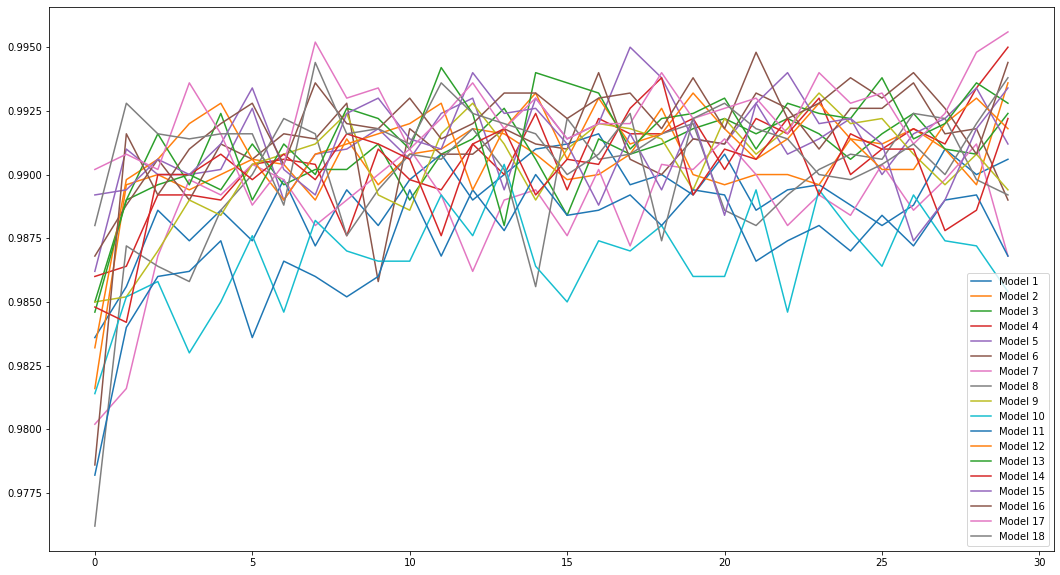

In [ ]:
history = []
plt.figure(figsize = (18, 10))
for i, exp2_model in enumerate(exp2_models):
  history.append(pd.DataFrame(exp2_model.history.history))
  plt.plot(history[i]['val_accuracy'], label = f'Model {i+1}')
  plt.legend()
plt.show()

In [ ]:
accuracies = {
    'val_acc': [],
    'test_acc': [],
    'indexes': [],
}
for i, exp2_model in enumerate(exp2_models):
  accuracies['val_acc'].append(history[i]['val_accuracy'][len(history[i]['val_accuracy'])-1])
  accuracies['test_acc'].append(calc_acc(exp2_model, X_test, y_test))
  accuracies['indexes'].append(f'model {i+1}')

for prop in accuracies:
  if prop == 'indexes':
    break
  elif prop == 'val_acc':
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i]*100, 3)
  else:
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i], 3)

accuracies_df = pd.DataFrame(accuracies, index = accuracies['indexes'])
accuracies_df.drop(['indexes'], axis = 1, inplace = True)

In [ ]:
accuracies_df

,val_acc,test_acc
model 1,99.06,98.94
model 2,99.36,99.10
model 3,99.24,99.04
model 4,99.50,98.82
model 5,99.12,98.90
model 6,98.90,98.86
model 7,98.68,98.90
model 8,98.92,98.84
model 9,98.94,98.90
model 10,98.54,98.62


## Experiment 3: Playing w/ number of units in dense layer.

from experiment 2, model 17 and model 8 have high accuracy.
<br>
<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--32--10<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--64--10<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--128--10<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--256--10<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--512--10<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--1024--10<br>
<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--32--10<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--64--10<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--128--10<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--256--10<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--512--10<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--1024--10<br>
<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--32--10<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--64--10<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--128--10<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--256--10<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--512--10<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--1024--10<br>
<br>

In [ ]:
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
exp3_models = []
for i in range(18):

    if i < 6:
      filter_1 = 16
      filter_2 = 32

    elif i > 5 or i < 12:
      filter_1 = 24
      filter_2 = 64

    else:
      filter_1 = 32
      filter_2 = 64


    exp3_model = Sequential()

    exp3_model.add(Conv2D(
        filters=filter_1,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        input_shape=(28, 28, 1),
        ))
    exp3_model.add(Conv2D(filters=filter_1, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp3_model.add(MaxPool2D(pool_size=(2, 2), strides=2))
    exp3_model.add(Conv2D(filters=filter_2, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp3_model.add(Conv2D(filters=filter_2, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp3_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    if i == 0 or i == 6 or i == 12:
        unit = 32
    elif i == 1 or i == 7 or i == 13:
        unit = 64
    elif i == 2 or i == 8 or i == 14:
        unit = 128
    elif i == 3 or i == 9 or i == 15:
        unit = 256
    elif i == 4 or i == 10 or i == 16:
        unit = 512
    else:
        unit = 1024


    exp3_model.add(Flatten())
    exp3_model.add(Dense(units=unit, activation='relu'))
    exp3_model.add(Dense(units=10, activation='softmax'))

    exp3_model.compile(loss='categorical_crossentropy', optimizer='adam'
                       , metrics=['accuracy'])
    exp3_model.fit(x=X_train, y=y_train, epochs=30,
                   validation_data=(X_val, y_val), callbacks = [annealer])

    exp3_models.append(exp3_model)
    exp3_model = None

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3251 - accuracy: 0.8972 - val_loss: 0.0398 - val_accuracy: 0.9868
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0402 - val_accuracy: 0.9856
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.0322 - val_accuracy: 0.9906
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0338 - val_accuracy: 0.9904
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0294 - val_accuracy: 0.9900
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0108 - accuracy: 0.9962 - val_loss: 0.0321 - val_accuracy:

In [ ]:
for i, exp3_model in enumerate(exp3_models):
  print(f"Model: ",i+1,"\n\n")
  print(exp3_model.summary())
  print("\n\n\n")

Model:  1 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)

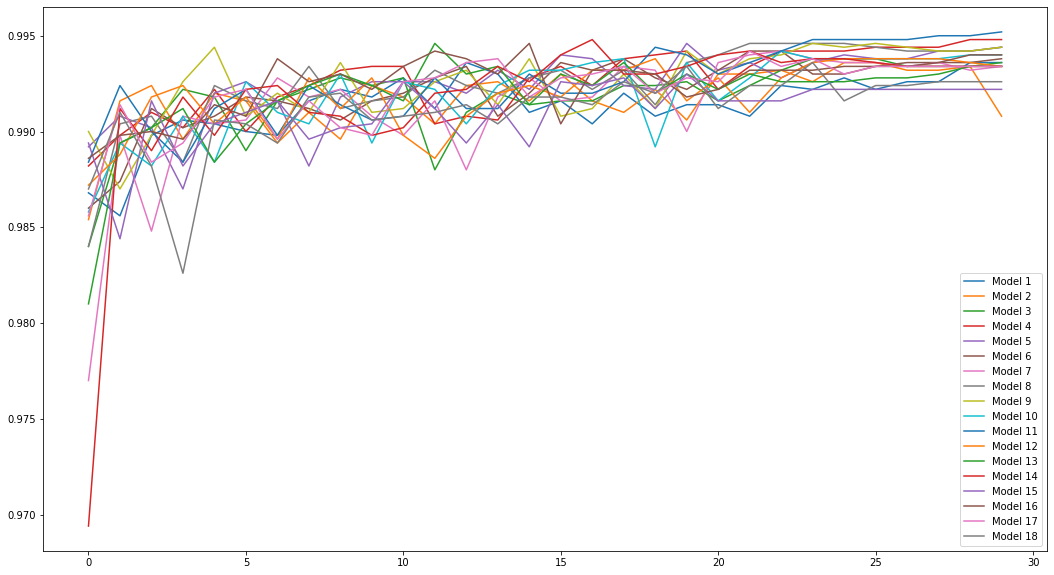

In [ ]:
history = []
plt.figure(figsize = (18, 10))
for i, exp3_model in enumerate(exp3_models):
  history.append(pd.DataFrame(exp3_model.history.history))
  plt.plot(history[i]['val_accuracy'], label = f'Model {i+1}')
  plt.legend()
plt.show()

In [ ]:
accuracies = {
    'val_acc': [],
    'test_acc': [],
    'indexes': [],
}
for i, exp3_model in enumerate(exp3_models):
  accuracies['val_acc'].append(history[i]['val_accuracy'][len(history[i]['val_accuracy'])-1])
  accuracies['test_acc'].append(calc_acc(exp3_model, X_test, y_test))
  accuracies['indexes'].append(f'model {i+1}')

for prop in accuracies:
  if prop == 'indexes':
    break
  elif prop == 'val_acc':
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i]*100, 3)
  else:
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i], 3)

accuracies_df = pd.DataFrame(accuracies, index = accuracies['indexes'])
accuracies_df.drop(['indexes'], axis = 1, inplace = True)

In [ ]:
accuracies_df

,val_acc,test_acc
model 1,99.36,99.54
model 2,99.08,99.38
model 3,99.36,99.50
model 4,99.48,99.56
model 5,99.44,99.50
model 6,99.38,99.32
model 7,99.34,99.46
model 8,99.44,99.50
model 9,99.44,99.54
model 10,99.40,99.42


## Experiment 4: Playing w/ dropout probability.

In experiment 2, all models performed really well.
from experiment 2, model 2, model 3 and model 6 have high accuracy.
<br>
<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--256--10 (Dropout = 0.2)<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--256--10 (Dropout = 0.3)<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--256--10 (Dropout = 0.4)<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--256--10 (Dropout = 0.5)<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--256--10 (Dropout = 0.6)<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--256--10 (Dropout = 0.7)<br>
1. (16C3-16C3-P2)--(32C3-32C3-P2)--256--10 (Dropout = 0.8)<br>
<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--128--10 (Dropout = 0.2)<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--128--10 (Dropout = 0.3)<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--128--10 (Dropout = 0.4)<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--128--10 (Dropout = 0.5)<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--128--10 (Dropout = 0.6)<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--128--10 (Dropout = 0.7)<br>
1. (24C3-24C3-P2)--(64C3-64C3-P2)--128--10 (Dropout = 0.8)<br>
<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--256--10 (Dropout = 0.2)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--256--10 (Dropout = 0.3)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--256--10 (Dropout = 0.4)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--256--10 (Dropout = 0.5)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--256--10 (Dropout = 0.6)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--256--10 (Dropout = 0.7)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--256--10 (Dropout = 0.8)<br>
<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--512--10 (Dropout = 0.2)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--512--10 (Dropout = 0.3)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--512--10 (Dropout = 0.4)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--512--10 (Dropout = 0.5)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--512--10 (Dropout = 0.6)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--512--10 (Dropout = 0.7)<br>
1. (32C3-32C3-P2)--(64C3-64C3-P2)--512--10 (Dropout = 0.8)<br>
<br>

In [ ]:
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
exp4_models = []
for i in range(28):
    exp4_model = Sequential()
    print("\n\n")
    print(f"Model: {i + 1}")
    print("\n\n")
    if i == 0 or i == 7 or i == 14 or i == 21:
        dropout = 0.2
    elif i == 1 or i == 8 or i == 15 or i == 22:
        dropout = 0.3
    elif i == 2 or i == 9 or i == 16 or i == 23:
        dropout = 0.4
    elif i == 3 or i == 10 or i == 17 or i == 24:
        dropout = 0.5
    elif i == 4 or i == 11 or i == 18 or i == 25:
        dropout = 0.6
    elif i == 5 or i == 12 or i == 19 or i == 26:
        dropout = 0.7
    else:
        dropout = 0.8

    if i < 7:
      filter_1 = 16
      filter_2 = 32
    elif i > 6 or i < 14:
      filter_1 = 24
      filter_2 = 64
    else:
      filter_1 = 32
      filter_2 = 64

    exp4_model.add(Conv2D(
        filters=filter_1,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        input_shape=(28, 28, 1),
        ))
    exp4_model.add(Conv2D(filters=filter_1, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp4_model.add(MaxPool2D(pool_size=(2, 2), strides=2))
    exp4_model.add(Dropout(rate=dropout))
    exp4_model.add(Conv2D(filters=filter_2, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp4_model.add(Conv2D(filters=filter_2, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp4_model.add(MaxPool2D(pool_size=(2, 2), strides=2))
    exp4_model.add(Dropout(rate=dropout))

    if i < 7:
        unit = 256
    elif i > 6 or i < 14:
        unit = 128
    elif i > 13 or i < 21:
        unit = 256
    else:
        unit = 512

    exp4_model.add(Flatten())
    exp4_model.add(Dense(units=unit, activation='relu'))
    exp4_model.add(Dropout(rate=dropout))
    exp4_model.add(Dense(units=10, activation='softmax'))

    exp4_model.compile(loss='categorical_crossentropy', optimizer='adam'
                       , metrics=['accuracy'])
    exp4_model.fit(x=X_train, y=y_train, epochs=30,
                   validation_data=(X_val, y_val), callbacks = [annealer])

    exp4_models.append(exp4_model)
    exp4_model = None





Model: 1



Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3155 - accuracy: 0.9004 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0584 - accuracy: 0.9818 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0243 - val_accuracy: 0.9932
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.0243 - val_accuracy: 0.9928
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0257 - val_accuracy: 0.9932
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0213 - accuracy: 0.9927 - val_loss: 0.0213 

In [ ]:
for i, exp4_model in enumerate(exp4_models):
  print(f"Model: ",i+1,"\n\n")
  print(exp4_model.summary())
  print("\n\n\n")

Model:  1 


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 7

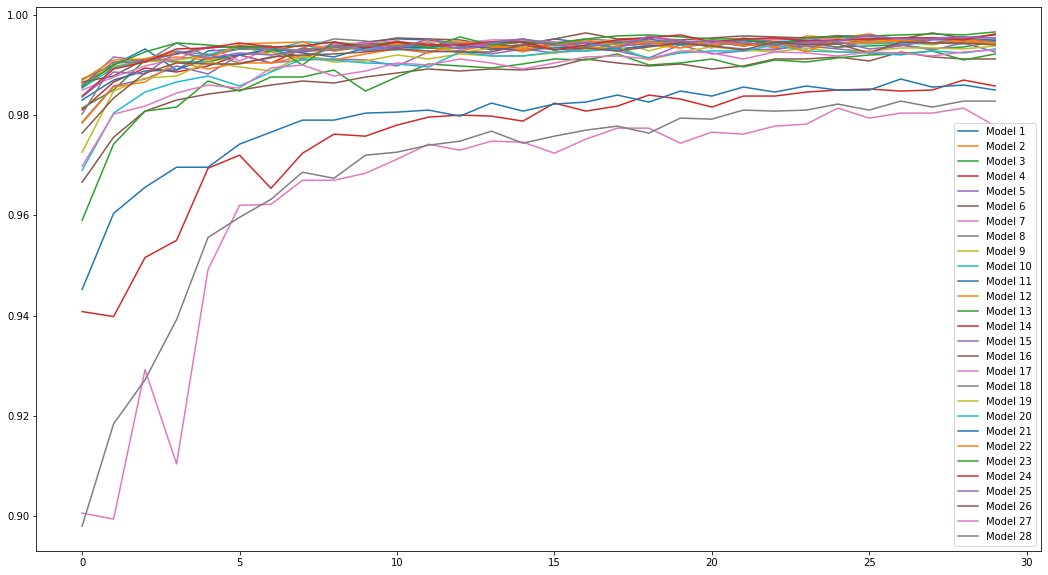

In [ ]:
history = []
plt.figure(figsize = (18, 10))
for i, exp4_model in enumerate(exp4_models):
  history.append(pd.DataFrame(exp4_model.history.history))
  plt.plot(history[i]['val_accuracy'], label = f'Model {i+1}')
  plt.legend()
plt.show()

In [ ]:
accuracies = {
    'val_acc': [],
    'test_acc': [],
    'indexes': [],
}
for i, exp4_model in enumerate(exp4_models):
  accuracies['val_acc'].append(history[i]['val_accuracy'][len(history[i]['val_accuracy'])-1])
  accuracies['test_acc'].append(calc_acc(exp4_model, X_test, y_test))
  accuracies['indexes'].append(f'model {i+1}')

for prop in accuracies:
  if prop == 'indexes':
    break
  elif prop == 'val_acc':
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i]*100, 3)
  else:
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i], 3)

accuracies_df = pd.DataFrame(accuracies, index = accuracies['indexes'])
accuracies_df.drop(['indexes'], axis = 1, inplace = True)

In [ ]:
accuracies_df

,val_acc,test_acc
model 1,99.42,99.62
model 2,99.48,99.60
model 3,99.46,99.68
model 4,99.50,99.64
model 5,99.26,99.54
model 6,99.12,99.22
model 7,97.78,98.12
model 8,99.46,99.56
model 9,99.42,99.66
model 10,99.50,99.60


## Experiment 5: Replace P2 with 32C5S2.

from experiment 2, model 1, model 2, model 3, model 6, model 7, model 8, and model 10 have high accuracy.
<br>
<br>
1. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--256--10 (Dropout = 0.2)<br>
2. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.3)<br>
3. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.4)<br>
4. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.5)<br>
5. (24C3-24C3-32C5S2)--(64C3-64C3-32C5S2)--128--10 (Dropout = 0.5)<br>
6. (24C3-24C3-32C5S2)--(64C3-64C3-32C5S2)--128--10 (Dropout = 0.6)<br>

In [ ]:
exp5_models = []
for i in range(6):
    exp5_model = Sequential()

    
    print("\n\n")
    print(f"Model: {i + 1}")
    print("\n\n")

    if i == 0:
        dropout = 0.2
    elif i == 1:
        dropout = 0.3
    elif i == 2:
        dropout = 0.4
    elif i == 3 or i == 4:
        dropout = 0.5
    else:
        dropout = 0.6

    if i < 4:
        filter_1 = 32
        filter_2 = 64
    else:
        filter_1 = 24
        filter_2 = 64
    
    exp5_model.add(Conv2D(
        filters=filter_1,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        input_shape=(28, 28, 1),
        ))
    exp5_model.add(Conv2D(filters=filter_1, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp5_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp5_model.add(Dropout(rate=dropout))
    exp5_model.add(Conv2D(filters=filter_2, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp5_model.add(Conv2D(filters=filter_2, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp5_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp5_model.add(Dropout(rate=dropout))

    if i == 0:
        unit = 256
    if i == 2 or i == 3 or i == 1:
        unit = 512
    if i == 4 or i == 5:
        unit = 128

    exp5_model.add(Flatten())
    exp5_model.add(Dense(units=unit, activation='relu'))
    exp5_model.add(Dropout(rate=dropout))
    exp5_model.add(Dense(units=10, activation='softmax'))

    exp5_model.compile(loss='categorical_crossentropy', optimizer='adam'
                       , metrics=['accuracy'])
    exp5_model.fit(x=X_train, y=y_train, epochs=40,
                   validation_data=(X_val, y_val),
                   callbacks = [annealer])

    exp5_models.append(exp5_model)
    exp5_model = None





Model: 1



Epoch 1/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3049 - accuracy: 0.9023 - val_loss: 0.0452 - val_accuracy: 0.9860
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0555 - accuracy: 0.9832 - val_loss: 0.0328 - val_accuracy: 0.9894
Epoch 3/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0204 - val_accuracy: 0.9942
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0221 - val_accuracy: 0.9932
Epoch 5/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0254 - val_accuracy: 0.9922
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.0229 - val_accuracy: 0.9940
Epoch 7/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0269

In [ ]:
for i, exp5_model in enumerate(exp5_models):
  print(f"Model: ",i+1,"\n\n")
  print(exp5_model.summary())
  print("\n\n\n")

Model:  1 


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_202 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 14, 14, 32)        25632     
_________________________________________________________________
dropout_93 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 7, 7

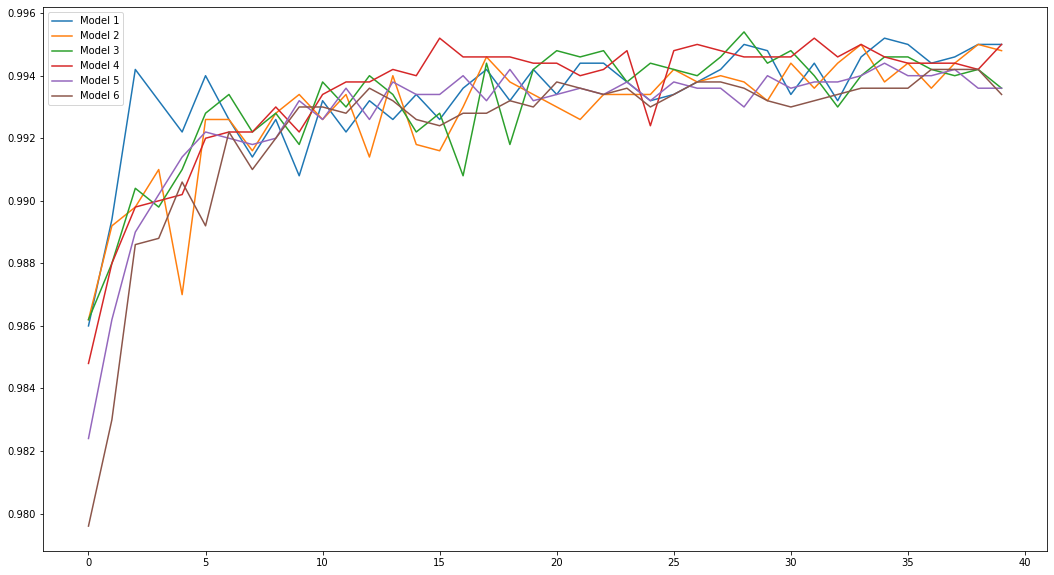

In [ ]:
history = []
plt.figure(figsize = (18, 10))
for i, exp5_model in enumerate(exp5_models):
  history.append(pd.DataFrame(exp5_model.history.history))
  plt.plot(history[i]['val_accuracy'], label = f'Model {i+1}')
  plt.legend()
plt.show()

In [ ]:
accuracies = {
    'val_acc': [],
    'test_acc': [],
    'indexes': [],
}
for i, exp5_model in enumerate(exp5_models):
  accuracies['val_acc'].append(history[i]['val_accuracy'][len(history[i]['val_accuracy'])-1])
  accuracies['test_acc'].append(calc_acc(exp5_model, X_test, y_test))
  accuracies['indexes'].append(f'model {i+1}')

for prop in accuracies:
  if prop == 'indexes':
    break
  elif prop == 'val_acc':
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i]*100, 3)
  else:
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i], 3)

accuracies_df = pd.DataFrame(accuracies, index = accuracies['indexes'])
accuracies_df.drop(['indexes'], axis = 1, inplace = True)

In [ ]:
accuracies_df

,val_acc,test_acc
model 1,99.50,99.60
model 2,99.48,99.60
model 3,99.36,99.64
model 4,99.50,99.60
model 5,99.36,99.60
model 6,99.34,99.54


## Experiment 6: Adding batchnormalization.
In experiment 5, model 1, 2, 3, 4 performed well.
<br>
<br>
1. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--256--10 (Dropout = 0.2)(BN)<br>
2. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.3)(BN)<br>
3. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.4)(BN)<br>
4. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.5)(BN)<br>



In [ ]:
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
exp6_models = []
for i in range(4):
    exp6_model = Sequential()

    if i == 0:
        dropout = 0.2
    elif i == 1:
        dropout = 0.3
    elif i == 2:
        dropout = 0.4
    else:
        dropout = 0.5

    exp6_model.add(Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        input_shape=(28, 28, 1),
        ))
    exp6_model.add(BatchNormalization())
    exp6_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp6_model.add(BatchNormalization())
    exp6_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp6_model.add(BatchNormalization())
    exp6_model.add(Dropout(rate=dropout))

    exp6_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp6_model.add(BatchNormalization())
    exp6_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp6_model.add(BatchNormalization())
    exp6_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp6_model.add(BatchNormalization())
    exp6_model.add(Dropout(rate=dropout))

    if i == 0:
        unit = 256
    else:
        unit = 512

    exp6_model.add(Flatten())

    exp6_model.add(Dense(units=unit, activation='relu'))
    exp6_model.add(BatchNormalization())
    exp6_model.add(Dropout(rate=dropout))
    exp6_model.add(Dense(units=10, activation='softmax'))

    exp6_model.compile(loss='categorical_crossentropy', optimizer='adam'
                       , metrics=['accuracy'])
    exp6_model.fit(x=X_train, y=y_train, epochs=40,
                   validation_data=(X_val, y_val),
                   callbacks = [annealer])

    exp6_models.append(exp6_model)
    exp6_model = None


Epoch 1/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2872 - accuracy: 0.9093 - val_loss: 0.0489 - val_accuracy: 0.9846
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0317 - val_accuracy: 0.9908
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0306 - val_accuracy: 0.9906
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.0207 - val_accuracy: 0.9938
Epoch 5/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0225 - val_accuracy: 0.9922
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0268 - val_accuracy: 0.9926
Epoch 7/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0162 - val_ac

In [ ]:
 for i, exp6_model in enumerate(exp6_models):
  print(f"Model: ",i+1,"\n\n")
  print(exp6_model.summary())
  print("\n\n\n")

Model:  1 


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_70 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_71 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
batch_normalization_72 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_30 (Dropout)         (None, 14, 

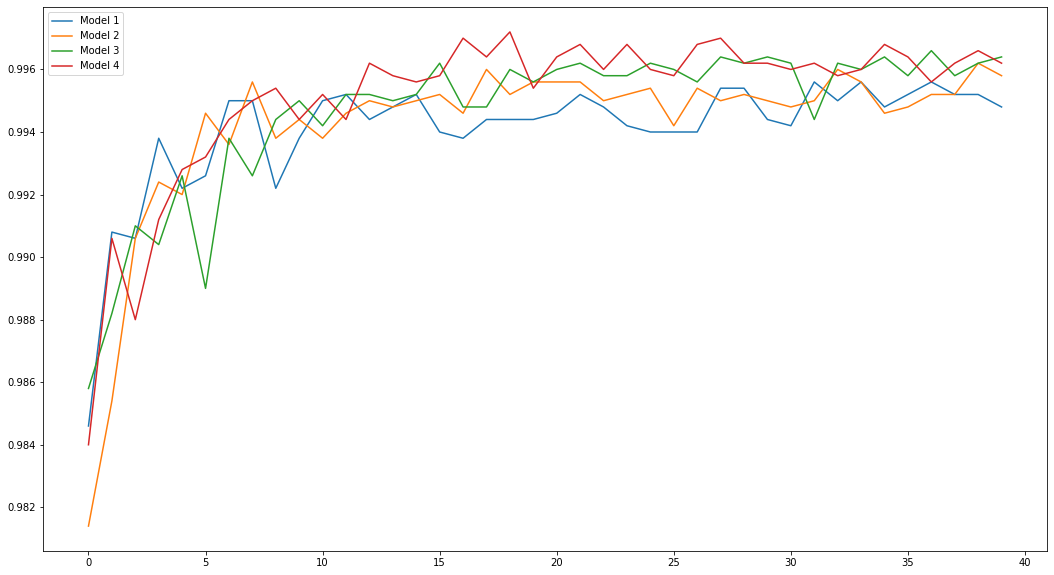

In [ ]:
history = []
plt.figure(figsize = (18, 10))
for i, exp6_model in enumerate(exp6_models):
  history.append(pd.DataFrame(exp6_model.history.history))
  plt.plot(history[i]['val_accuracy'], label = f'Model {i+1}')
  plt.legend()
plt.show()

In [ ]:
accuracies = {
    'val_acc': [],
    'test_acc': [],
    'indexes': [],
}
for i, exp6_model in enumerate(exp6_models):
  accuracies['val_acc'].append(history[i]['val_accuracy'][len(history[i]['val_accuracy'])-1])
  accuracies['test_acc'].append(calc_acc(exp6_model, X_test, y_test))
  accuracies['indexes'].append(f'model {i+1}')

for prop in accuracies:
  if prop == 'indexes':
    break
  elif prop == 'val_acc':
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i]*100, 3)
  else:
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i], 3)

accuracies_df = pd.DataFrame(accuracies, index = accuracies['indexes'])
accuracies_df.drop(['indexes'], axis = 1, inplace = True)

In [ ]:
accuracies_df

,val_acc,test_acc
model 1,99.48,99.60
model 2,99.58,99.62
model 3,99.64,99.68
model 4,99.62,99.62


## Experiment 7: Image data augmentation
In experiment 6, all models performed. So, all models are trained in experiment 7 also.
<br>
<br>
1. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--256--10 (Dropout = 0.2)(BN)(Data-Aug)<br>
2. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.3)(BN)(Data-Aug)<br>
3. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.4)(BN)(Data-Aug)<br>
4. (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.5)(BN)(Data-Aug)<br>




In [ ]:
import tensorflow.keras as tf
datagen = tf.preprocessing.image.ImageDataGenerator(
        rotation_range=15,
        zoom_range = 0.15,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [ ]:
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
exp7_models = []
for i in range(4):
    exp7_model = Sequential()

    if i == 0:
        dropout = 0.2
    elif i == 1:
        dropout = 0.3
    elif i == 2:
        dropout = 0.4
    else:
        dropout = 0.5

    exp7_model.add(Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        input_shape=(28, 28, 1),
        ))
    exp7_model.add(BatchNormalization())
    exp7_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp7_model.add(BatchNormalization())
    exp7_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp7_model.add(BatchNormalization())
    exp7_model.add(Dropout(rate=dropout))

    exp7_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp7_model.add(BatchNormalization())
    exp7_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp7_model.add(BatchNormalization())
    exp7_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp7_model.add(BatchNormalization())
    exp7_model.add(Dropout(rate=dropout))

    if i == 0:
        unit = 256
    else:
        unit = 512

    exp7_model.add(Flatten())

    exp7_model.add(Dense(units=unit, activation='relu'))
    exp7_model.add(BatchNormalization())
    exp7_model.add(Dropout(rate=dropout))
    exp7_model.add(Dense(units=10, activation='softmax'))

    exp7_model.compile(loss='categorical_crossentropy', optimizer='adam'
                       , metrics=['accuracy'])
    exp7_model.fit(datagen.flow(X_train, y_train, batch_size=32),
                   epochs=40, steps_per_epoch=len(X_train) // 32,
                   validation_data=(X_val, y_val), callbacks=[annealer])
    exp7_models.append(exp7_model)
    exp7_model = None

Epoch 1/40
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5284 - accuracy: 0.8367 - val_loss: 0.0502 - val_accuracy: 0.9826
Epoch 2/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0976 - accuracy: 0.9700 - val_loss: 0.0269 - val_accuracy: 0.9900
Epoch 3/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0749 - accuracy: 0.9772 - val_loss: 0.0499 - val_accuracy: 0.9838
Epoch 4/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0620 - accuracy: 0.9805 - val_loss: 0.0231 - val_accuracy: 0.9916
Epoch 5/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0530 - accuracy: 0.9844 - val_loss: 0.0217 - val_accuracy: 0.9922
Epoch 6/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0137 - val_accuracy: 0.9954
Epoch 7/40
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0421 - accuracy: 0.9877 - val_loss: 0.0159 -

In [ ]:
 for i, exp7_model in enumerate(exp7_models):
  print(f"Model: ",i+1,"\n\n")
  print(exp7_model.summary())
  print("\n\n\n")

Model:  1 


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_28 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_29 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
batch_normalization_30 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 1

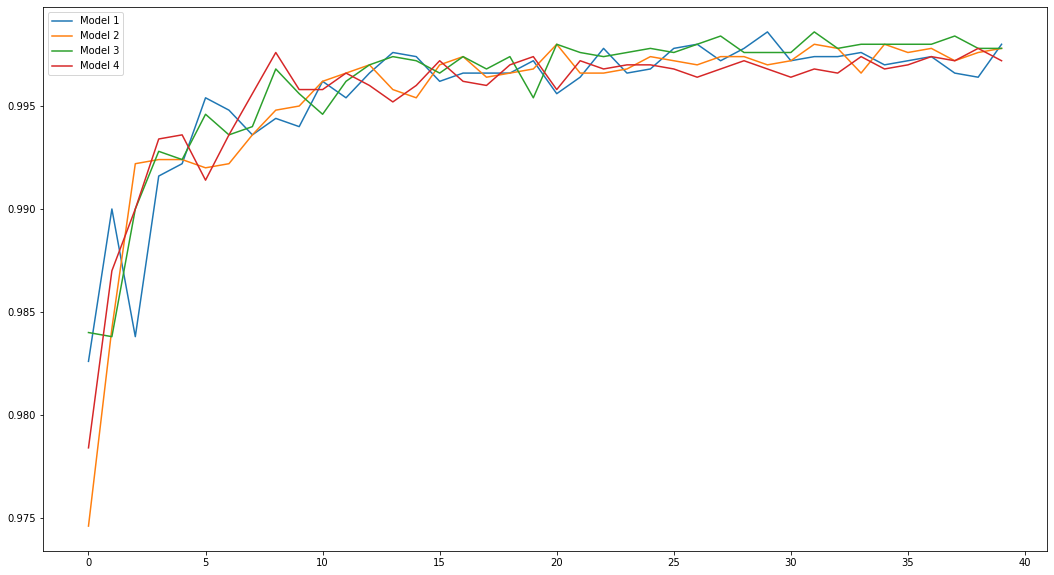

In [ ]:
history = []
plt.figure(figsize = (18, 10))
for i, exp7_model in enumerate(exp7_models):
  history.append(pd.DataFrame(exp7_model.history.history))
  plt.plot(history[i]['val_accuracy'], label = f'Model {i+1}')
  plt.legend()
plt.show()

In [ ]:
accuracies = {
    'val_acc': [],
    'test_acc': [],
    'indexes': [],
}
for i, exp7_model in enumerate(exp7_models):
  accuracies['val_acc'].append(history[i]['val_accuracy'][len(history[i]['val_accuracy'])-1])
  accuracies['test_acc'].append(calc_acc(exp7_model, X_test, y_test))
  accuracies['indexes'].append(f'model {i+1}')

for prop in accuracies:
  if prop == 'indexes':
    break
  elif prop == 'val_acc':
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i]*100, 3)
  else:
    for i, e in enumerate(accuracies[prop]):
      accuracies[prop][i] = round(accuracies[prop][i], 3)

accuracies_df = pd.DataFrame(accuracies, index = accuracies['indexes'])
accuracies_df.drop(['indexes'], axis = 1, inplace = True)

In [ ]:
accuracies_df

,val_acc,test_acc
model 1,99.80,99.52
model 2,99.78,99.40
model 3,99.78,99.54
model 4,99.72,99.58


## Experiment 8: Ensemble Modelling

### Experment 8.1: Ensemble modelling using all the models from previous experiment(experiment 7).

In [ ]:
import tensorflow.keras as tf
datagen = tf.preprocessing.image.ImageDataGenerator(
        rotation_range=15,
        zoom_range = 0.15,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
exp8_models = []
for i in range(4):
    exp8_model = Sequential()
    if i == 0:
        dropout = 0.2
    elif i == 1:
        dropout = 0.3
    elif i == 2:
        dropout = 0.4
    else:
        dropout = 0.5
        
    print("\n\n")
    print(f"Model: {i + 1}")
    print("\n\n")
    X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train, y_train, test_size = 0.1)

    exp8_model.add(Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        input_shape=(28, 28, 1),
        ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Dropout(rate=dropout))

    exp8_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Dropout(rate=dropout))

    if i == 0:
        unit = 256
    else:
        unit = 512

    exp8_model.add(Flatten())

    exp8_model.add(Dense(units=unit, activation='relu'))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Dropout(rate=dropout))
    exp8_model.add(Dense(units=10, activation='softmax'))

    exp8_model.compile(loss='categorical_crossentropy', optimizer='adam'
                       , metrics=['accuracy'])
    exp8_model.fit(datagen.flow(X_train_2, y_train_2, batch_size=32),
                   epochs=40, steps_per_epoch=len(X_train_2) // 32,
                   validation_data=(X_val_2, y_val_2), callbacks=[annealer])
    
    exp8_models.append(exp8_model)
    exp8_model = None




Model: 1



Epoch 1/40
1687/1687 [==============================] - 55s 13ms/step - loss: 0.5331 - accuracy: 0.8343 - val_loss: 0.0499 - val_accuracy: 0.9835
Epoch 2/40
1687/1687 [==============================] - 21s 13ms/step - loss: 0.1017 - accuracy: 0.9692 - val_loss: 0.0284 - val_accuracy: 0.9907
Epoch 3/40
1687/1687 [==============================] - 21s 13ms/step - loss: 0.0810 - accuracy: 0.9761 - val_loss: 0.0265 - val_accuracy: 0.9918
Epoch 4/40
1687/1687 [==============================] - 21s 13ms/step - loss: 0.0665 - accuracy: 0.9786 - val_loss: 0.0354 - val_accuracy: 0.9880
Epoch 5/40
1687/1687 [==============================] - 22s 13ms/step - loss: 0.0529 - accuracy: 0.9832 - val_loss: 0.0266 - val_accuracy: 0.9922
Epoch 6/40
1687/1687 [==============================] - 21s 13ms/step - loss: 0.0482 - accuracy: 0.9856 - val_loss: 0.0262 - val_accuracy: 0.9913
Epoch 7/40
1687/1687 [==============================] - 21s 13ms/step - loss: 0.0438 - accuracy: 0.9867 - val

In [ ]:
_, (X_test, y_test) = mnist.load_data()
X_test = X_test / 255.0
X_test = X_test.reshape(10000, 28, 28, 1)
y_test = to_categorical(y_test)

In [ ]:
result = []
resultNew = np.zeros((X_test.shape[0], 10))
for i, exp8_model in enumerate(exp8_models):
    result.append(exp8_model.predict(X_test))
    resultNew += result[i]
resultNew = np.argmax(resultNew, axis = 1)
y_testNew = np.argmax(y_test, axis = 1)

correct = 0
for i in range(10000):
  if resultNew[i] == y_testNew[i]:
    correct += 1
  
print(f"Ensemble Accuracy: {(correct/10000.0)*100.0} %")

Ensemble Accuracy: 99.72999999999999 %


### Experment 8.2: Ensemble modelling using all the models from previous experiment(experiment 7). But using both train and test set from training the network.

In [ ]:
new_X = np.concatenate((X_train, X_test), axis = 0)
new_y = np.concatenate((y_train, y_test), axis = 0)

In [ ]:
exp8_models = []
for i in range(4):
    exp8_model = Sequential()
    if i == 0:
        dropout = 0.2
    elif i == 1:
        dropout = 0.3
    elif i == 2:
        dropout = 0.4
    else:
        dropout = 0.5
        
    print("\n\n")
    print(f"Model: {i + 1}")
    print("\n\n")
    

    exp8_model.add(Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        input_shape=(28, 28, 1),
        ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Dropout(rate=dropout))

    exp8_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'
                   , activation='relu', kernel_initializer='he_uniform'
                   ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        activation='relu',
        kernel_initializer='he_uniform',
        ))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Dropout(rate=dropout))

    if i == 0:
        unit = 256
    else:
        unit = 512

    exp8_model.add(Flatten())

    exp8_model.add(Dense(units=unit, activation='relu'))
    exp8_model.add(BatchNormalization())
    exp8_model.add(Dropout(rate=dropout))
    exp8_model.add(Dense(units=10, activation='softmax'))

    exp8_model.compile(loss='categorical_crossentropy', optimizer='adam'
                       , metrics=['accuracy'])
    exp8_model.fit(datagen.flow(new_X, new_y, batch_size=32),
                   epochs=40, steps_per_epoch=len(new_X) // 32,
                   validation_data=(X_val_2, y_val_2), callbacks=[annealer])
    
    exp8_models.append(exp8_model)
    exp8_model = None




Model: 1



Epoch 1/40
2187/2187 [==============================] - 28s 12ms/step - loss: 0.4825 - accuracy: 0.8508 - val_loss: 0.0700 - val_accuracy: 0.9795
Epoch 2/40
2187/2187 [==============================] - 27s 12ms/step - loss: 0.0894 - accuracy: 0.9724 - val_loss: 0.0404 - val_accuracy: 0.9887
Epoch 3/40
2187/2187 [==============================] - 27s 12ms/step - loss: 0.0633 - accuracy: 0.9802 - val_loss: 0.0308 - val_accuracy: 0.9915
Epoch 4/40
2187/2187 [==============================] - 27s 12ms/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.0522 - val_accuracy: 0.9830
Epoch 5/40
2187/2187 [==============================] - 27s 12ms/step - loss: 0.0478 - accuracy: 0.9846 - val_loss: 0.0183 - val_accuracy: 0.9940
Epoch 6/40
2187/2187 [==============================] - 27s 12ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.0162 - val_accuracy: 0.9950
Epoch 7/40
2187/2187 [==============================] - 27s 12ms/step - loss: 0.0398 - accuracy: 0.9879 - val

In [ ]:
result = []
resultNew = np.zeros((X_test.shape[0], 10))
for i, exp8_model in enumerate(exp8_models):
    result.append(exp8_model.predict(X_test))
    resultNew += result[i]
resultNew = np.argmax(resultNew, axis = 1)
y_testNew = np.argmax(y_test, axis = 1)

correct = 0
for i in range(10000):
  if resultNew[i] == y_testNew[i]:
    correct += 1
  
print(f"Ensemble Accuracy: {(correct/10000.0)*100.0} %")

Ensemble Accuracy: 99.96000000000001 %


## Conclusion:

Here, I tried more than 90 neural network with different parameters and technique. From experiment 8.1 I achieved **~99.73%** accuracy using ensemble technque and from experiment 8.2 I achieved **~99.96%** using ensemble technique but in experiment 8.2 I have used [train + test] set for training. I don't know whether it is a good practice of not.
<br><br>
Models in exp 8.1:<br>
model 1: (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--256--10 (Dropout = 0.2)(BN)(Data-Aug)<br>
model 2: (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.3)(BN)(Data-Aug)<br>
model 3: (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.4)(BN)(Data-Aug)<br>
model 4: (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.5)(BN)(Data-Aug)<br>
<br>
Models in exp 8.2: (same as exp 8.1) <br>
model 1: (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--256--10 (Dropout = 0.2)(BN)(Data-Aug)<br>
model 2: (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.3)(BN)(Data-Aug)<br>
model 3:  (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.4)(BN)(Data-Aug)<br>
model 4: (32C3-32C3-32C5S2)--(64C3-64C3-32C5S2)--512--10 (Dropout = 0.5)(BN)(Data-Aug)<br>
<br><br>
Priciple followed:<br>
Step 1: Frame different model with different parameters.<br>
Step 2: Train the framed models.<br>
Step 3: Validate the model with validation set and test set.<br>
Step 4: Select the model with high test accuracy and validation accuracy for next experiment.<br>
step 5: Repeat from step 1 to 4, until you get better accuracy.<br>

# Thank you !!👍❤